## NAMA : ADI HERIANTO RAJAGUKGUK
## RAKAMIN STUDENT BATCH 22


# LIBRARIES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


# IMPORTING DATA 

### 1. DARI GDRIVE

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### a. Aplication Train

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/VIX2/home-credit-default-risk/application_train.csv')
df.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### b. Application Test

In [5]:
df_test = pd.read_csv('/content/gdrive/My Drive/VIX2/home-credit-default-risk/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### c. Bureau Balance 

In [6]:
df_balance = pd.read_csv('/content/gdrive/My Drive/VIX2/home-credit-default-risk/bureau_balance.csv')
df_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


#### d. Bureau

In [7]:
df_bureau = pd.read_csv('/content/gdrive/My Drive/VIX2/home-credit-default-risk/bureau.csv')
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### e. Credit card Balance

In [8]:
df_cc_balance = pd.read_csv('/content/gdrive/My Drive/VIX2/home-credit-default-risk/credit_card_balance.csv')
df_cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# EXPLORING DATA 

In [9]:
df.shape

(307511, 122)

In [10]:
df.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12607,114699,0,Cash loans,F,N,Y,0,121500.0,808650.0,31464.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.SK_ID_CURR.nunique()

307511

Terlihat bahwa tidak ada `id`  yang duplikat, artinya setiap baris sudah mewakili satu individu.

#### Mengecek dan menghapus kolom yang mengandung missing value > 30%

In [12]:
missing_values_count_in_percent = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
pd.set_option('display.max_rows', None)
display(pd.DataFrame(missing_values_count_in_percent))
pd.reset_option('all')

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



Ada beberapa kolom yang memiliki jumlah missing value yang sangat banyak, bahkan melebihi 50%. Untuk menghapus missing value pada beberapa kolom, kita lebih baik membuat asumsi saja, jika kolom yang memiliki missing value > 30%, lebih baik kolomnya dihapus, sedangkan jika dibawah 30%, maka akan dilakukan imputasi nilai pada missing value. 

Beberapa kolom yang memiliki nilai missing value > 40%, yaitu :
- COMMONAREA_MEDI	69.872297
- COMMONAREA_AVG	69.872297
- COMMONAREA_MODE	69.872297
- NONLIVINGAPARTMENTS_MODE	69.432963
- NONLIVINGAPARTMENTS_AVG	69.432963
- NONLIVINGAPARTMENTS_MEDI	69.432963
- FONDKAPREMONT_MODE	68.386172
- LIVINGAPARTMENTS_MODE	68.354953
- LIVINGAPARTMENTS_AVG	68.354953
- LIVINGAPARTMENTS_MEDI	68.354953
- FLOORSMIN_AVG	67.848630
- FLOORSMIN_MODE	67.848630
- FLOORSMIN_MEDI	67.848630
- YEARS_BUILD_MEDI	66.497784
- YEARS_BUILD_MODE	66.497784
- YEARS_BUILD_AVG	66.497784
- OWN_CAR_AGE	65.990810
- LANDAREA_MEDI	59.376738
- LANDAREA_MODE	59.376738
- LANDAREA_AVG	59.376738
- BASEMENTAREA_MEDI	58.515956
- BASEMENTAREA_AVG	58.515956
- BASEMENTAREA_MODE	58.515956
- EXT_SOURCE_1	56.381073
- NONLIVINGAREA_MODE	55.179164
- NONLIVINGAREA_AVG	55.179164
- NONLIVINGAREA_MEDI	55.179164
- ELEVATORS_MEDI	53.295980
- ELEVATORS_AVG	53.295980
- ELEVATORS_MODE	53.295980
- WALLSMATERIAL_MODE	50.840783
- APARTMENTS_MEDI	50.749729
- APARTMENTS_AVG	50.749729
- APARTMENTS_MODE	50.749729
- ENTRANCES_MEDI	50.348768
- ENTRANCES_AVG	50.348768
- ENTRANCES_MODE	50.348768
- LIVINGAREA_AVG	50.193326
- LIVINGAREA_MODE	50.193326
- LIVINGAREA_MEDI	50.193326
- HOUSETYPE_MODE	50.176091
- FLOORSMAX_MODE	49.760822
- FLOORSMAX_MEDI	49.760822
- FLOORSMAX_AVG	49.760822
- YEARS_BEGINEXPLUATATION_MODE	48.781019
- YEARS_BEGINEXPLUATATION_MEDI	48.781019
- YEARS_BEGINEXPLUATATION_AVG	48.781019
- TOTALAREA_MODE	48.268517
- EMERGENCYSTATE_MODE	47.398304
- OCCUPATION_TYPE

In [13]:
cols_to_drop = ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE',
'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG', 'FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG','OWN_CAR_AGE', 'LANDAREA_MEDI','LANDAREA_MODE', 'LANDAREA_AVG','BASEMENTAREA_MEDI',
'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG',
'ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE',
'LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE', 'FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'SK_ID_CURR']

In [14]:
data = df.drop(cols_to_drop, axis=1)

In [15]:
data.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
91547,0,Cash loans,F,N,N,1,270000.0,1671489.0,45963.0,1494000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
226021,1,Cash loans,F,N,N,1,292500.0,675000.0,49248.0,675000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
110150,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
206180,0,Revolving loans,F,Y,Y,1,270000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
214072,0,Cash loans,F,N,N,0,180000.0,1125000.0,30937.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


#### Mengecek  data yang duplikat

In [17]:
print('Data yang duplikat = ', data.duplicated().sum())

Data yang duplikat =  0


#### Mengecek kembali ketepatan tipe data 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

<B> Semua tipe data sudah sesuai. 

# DEFINE TARGET VARIABLE / LABELING

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut. 

Dalam dataset ini, variabel `TARGET` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [19]:
data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

TARGET :
- 1 : Client had late payment more than X days
- 0 : On time

In [20]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
Total_applicants = df.shape[0]

In [22]:
a = df.groupby(['TARGET'])['SK_ID_CURR'].count().reset_index()
a['Persentase(%)'] = a['SK_ID_CURR']/Total_applicants*100
a

,TARGET,SK_ID_CURR,Persentase(%)
0,0,282686,91.927118
1,1,24825,8.072882


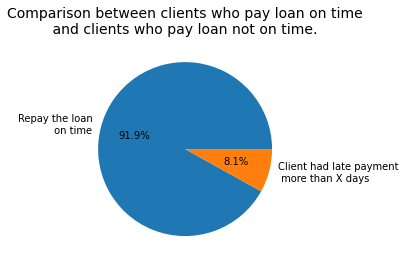

In [23]:
A=['Repay the loan\n on time', 'Client had late payment\n more than X days']
T=[91.93, 8.07]
  
plt.pie(T, labels=A,autopct= '%1.1f%%')
plt.title('Comparison between clients who pay loan on time\n and clients who pay loan not on time. ', size = 14)
plt.show()

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

### 1. Ekstrak fitur AGE dari kolom DAYS BIRTH

In [25]:
data['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [26]:
import math
data['AGE'] = abs(data['DAYS_BIRTH']/(365))
data['AGE'] = round(data['AGE'], 0)


### Grouping by Data Variable Type (Pick + Separate Columns)

In [27]:
category = data.select_dtypes(include='object')
numerical = data.select_dtypes(exclude='object')

In [28]:
nums = numerical.columns.to_list()
cats = category.columns.to_list()

In [29]:
print("Data numerik: ", nums)
print("Data category: ", cats)

Data numerik:  ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14

### A. DATA NUMERIKAL

In [30]:
data[nums].describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
AGE,307511.000000,43.938646,11.964047,21.000000,34.000000,43.000000,54.000000,69.000000
HOUR_APPR_PROCESS_START,307511.000000,12.063419,3.265832,0.000000,10.000000,12.000000,14.000000,23.000000
CNT_FAM_MEMBERS,307509.000000,2.152665,0.910682,1.000000,2.000000,2.000000,3.000000,20.000000
REGION_RATING_CLIENT,307511.000000,2.052463,0.509034,1.000000,2.000000,2.000000,2.000000,3.000000
REGION_RATING_CLIENT_W_CITY,307511.000000,2.031521,0.502737,1.000000,2.000000,2.000000,2.000000,3.000000


### B. DATA KATEGORIKAL

In [31]:
data.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="orange").bar(subset = ["unique"], color ="red").bar(subset = ["count"], color ="blue")

,count,unique,top,freq
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
FLAG_OWN_CAR,307511,2,N,202924
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
CODE_GENDER,307511,3,F,202448
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232


In [32]:
for col in cats:
    print(f"Value count column {col}:")
    print(data[col].value_counts())
    print()

Value count column NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count column CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count column FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count column FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count column NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count column NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int

pada `CODE GENDER`, ada value yang tidak valid 'XNA', kita anggap saja gendernya adalah F untuk mempermudah feature encoding.  

In [33]:
data['CODE_GENDER'].replace('XNA', 'F', inplace = True)

In [34]:
data['CODE_GENDER'].describe()

count     307511
unique         2
top            F
freq      202452
Name: CODE_GENDER, dtype: object

Sudah oke. 

# EXPLORATORY DATA ANALYSIS

### Correlation Check

In [34]:
data.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.078263
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,...,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550,-0.330812
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,...,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690,-0.027201
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,0.009621,...,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448,0.055482
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,0.038514,...,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320,-0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,-0.001069,...,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917,0.001252
AMT_REQ_CREDIT_BUREAU_MON,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,-0.011353,...,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975,-0.001397
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,-0.001308,...,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208,0.011844
AMT_REQ_CREDIT_BUREAU_YEAR,0.019930,-0.041550,0.011690,-0.048448,-0.011320,-0.050998,0.001003,-0.071983,0.049988,-0.024805,...,-0.007009,-0.012126,-0.005457,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000,0.072011


Text(0.5, 1.0, 'Korelasi')

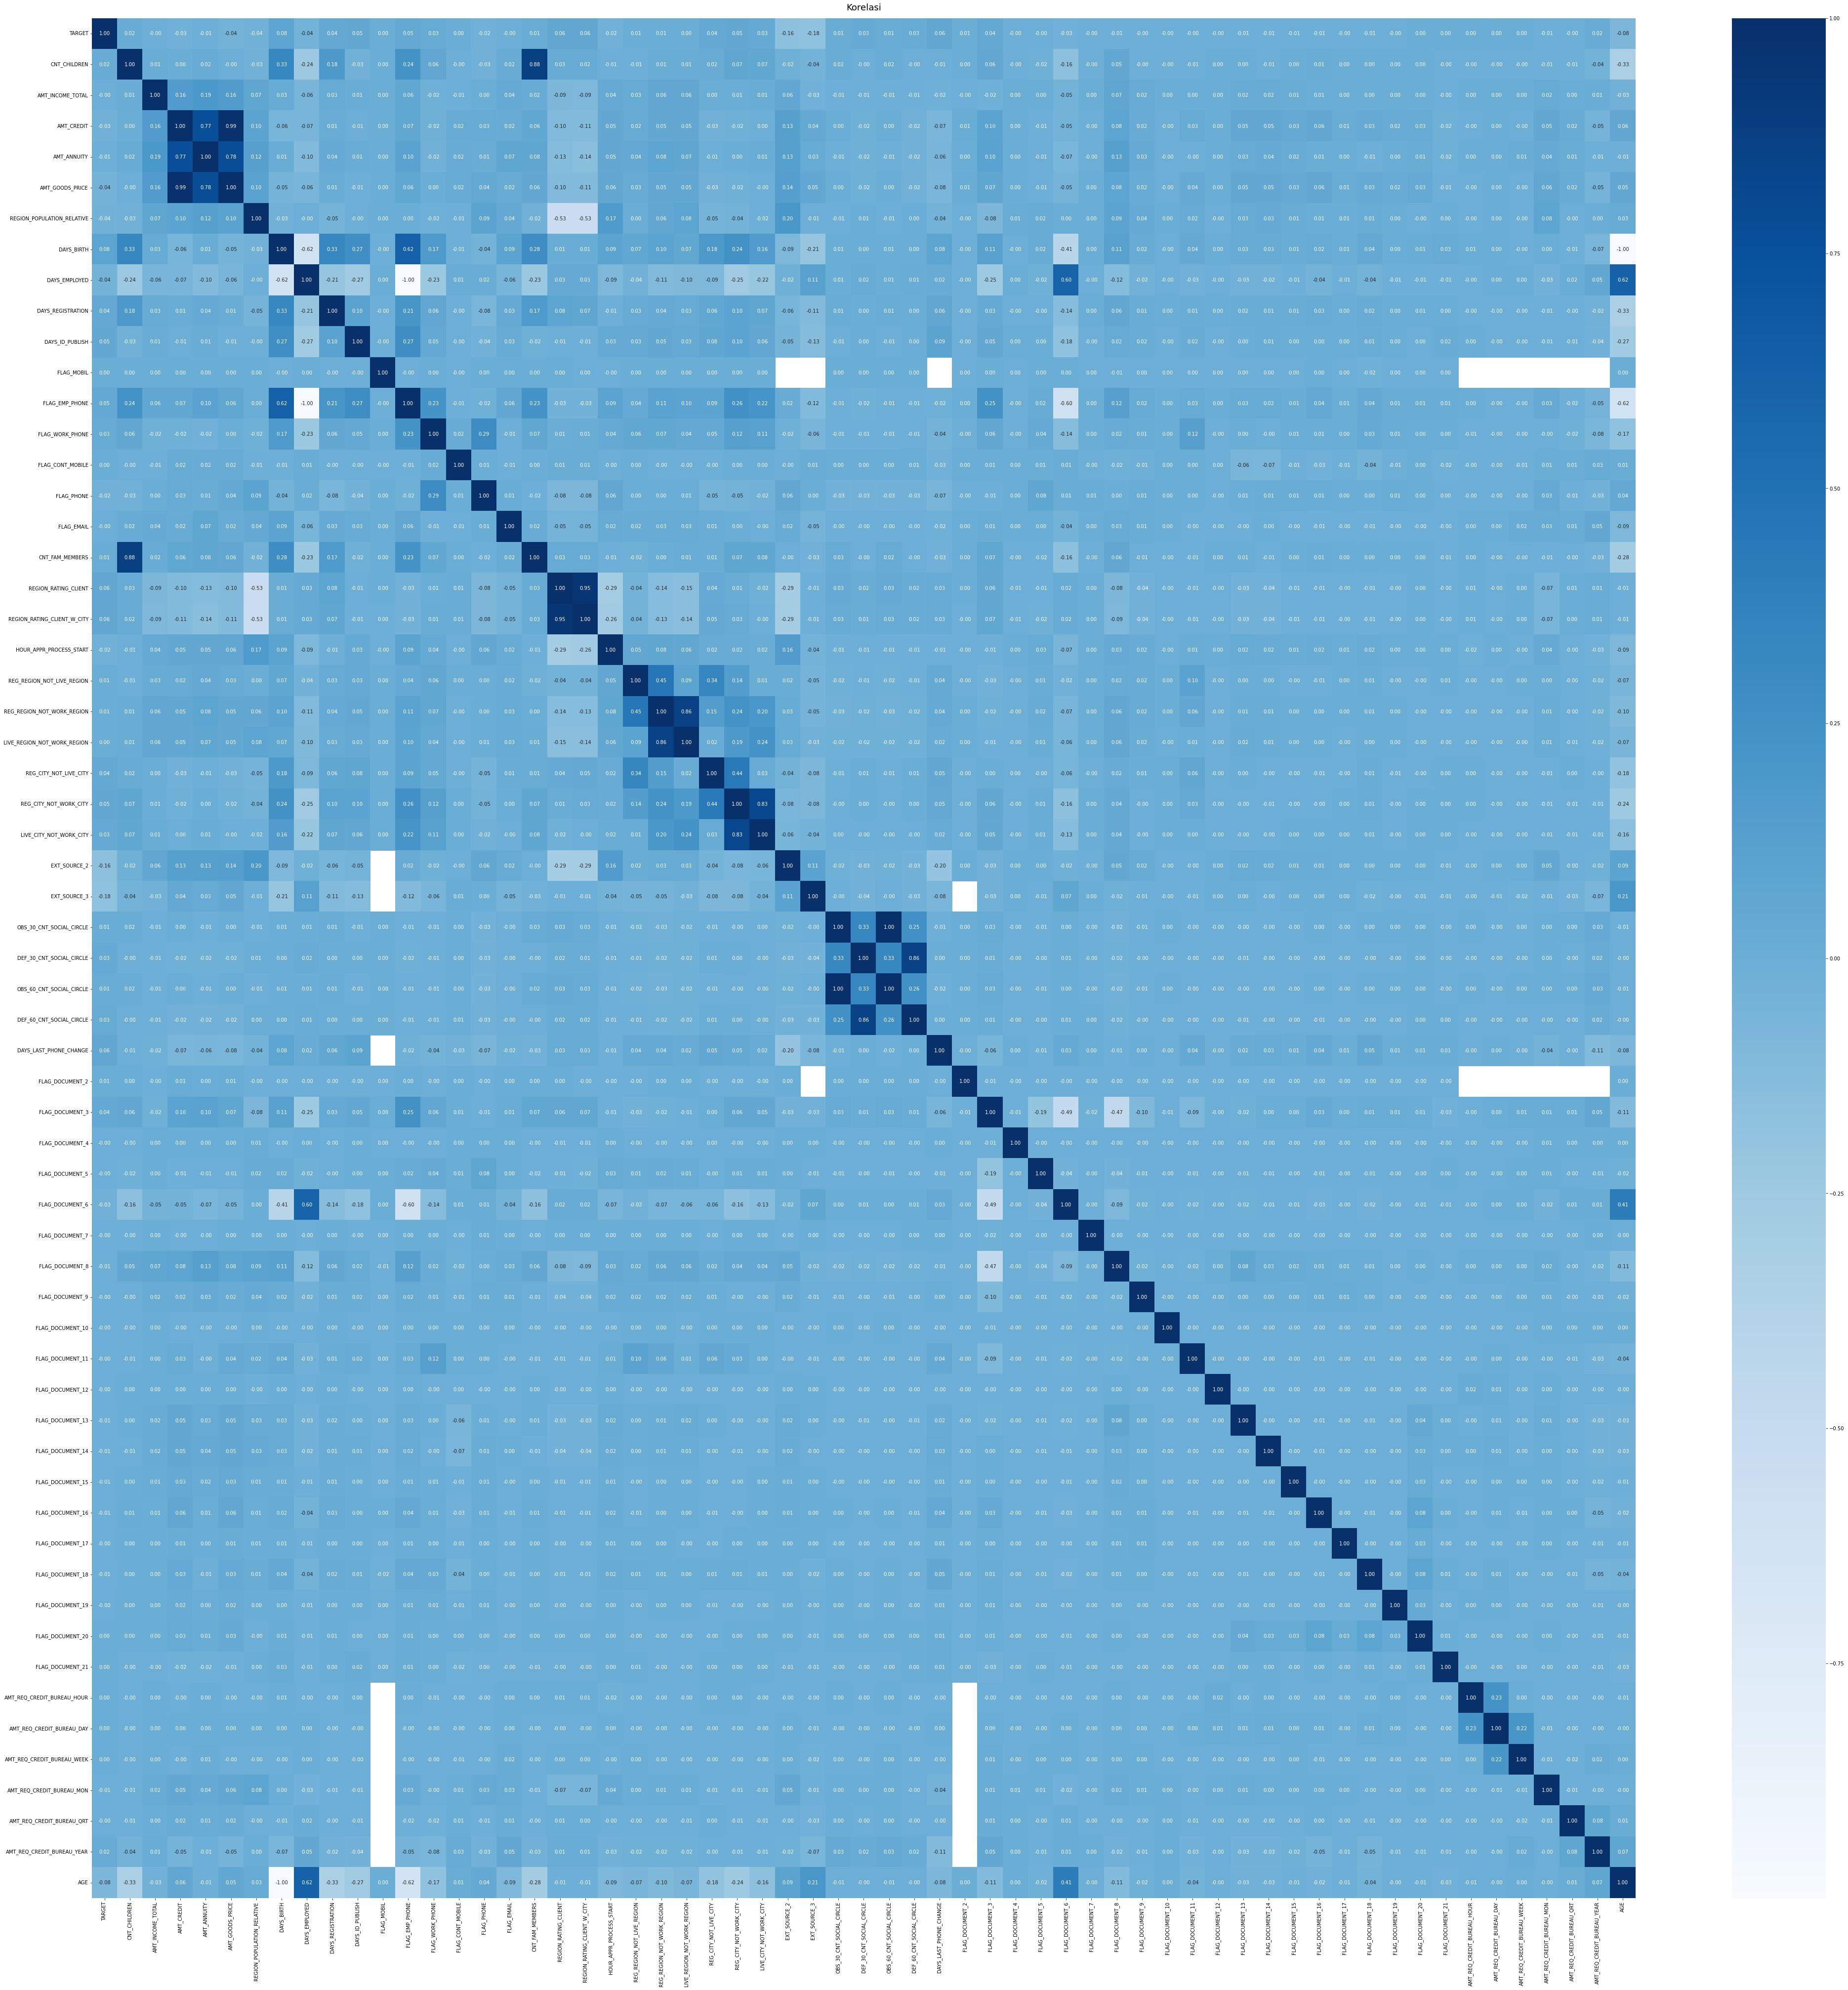

In [35]:
plt.figure(figsize=(70,70))
heatmaps=sns.heatmap(data.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

In [36]:
data = data.drop('DAYS_BIRTH', axis = 1)

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti. 

In [37]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.8)]

In [38]:
to_drop_hicorr

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [39]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [40]:
data.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [41]:
data.select_dtypes(exclude='object').nunique()

TARGET                             2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
REGION_POPULATION_RELATIVE        81
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
FLAG_MOBIL                         2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
FLAG_EMAIL                         2
REGION_RATING_CLIENT               3
HOUR_APPR_PROCESS_START           24
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
EXT_SOURCE_2                  119831
EXT_SOURCE_3                     814
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
DAYS_LAST_PHONE_CHANGE          3773
FLAG_DOCUMENT_2                    2
FLAG_DOCUMENT_3                    2
F

In [42]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secon

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [43]:
data.drop(['ORGANIZATION_TYPE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], axis=1, inplace=True)

## BUSINESS INSIGHT

### 1. DISTRIBUTION OF CLIENT'S AGE

Text(0, 0.5, 'Frequency')

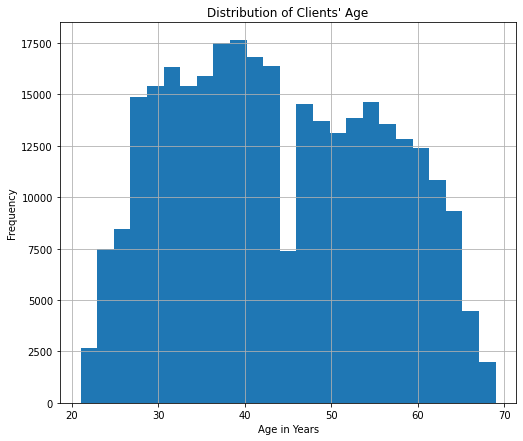

In [47]:
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1)
data['AGE'].hist(bins=25)
plt.title('Distribution of Clients\' Age')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')

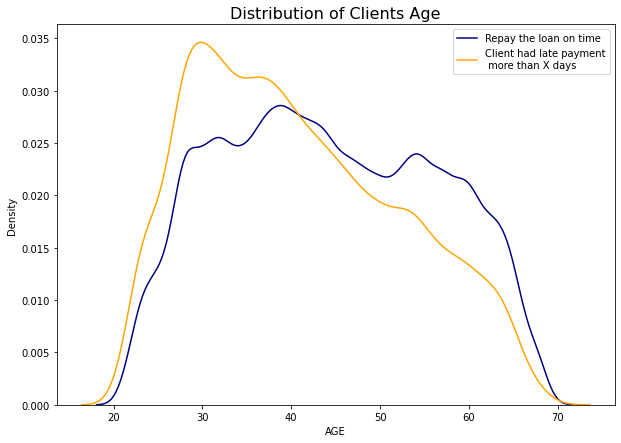

In [48]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(data[data['TARGET']==0]['AGE'].dropna(),color='navy',label='Repay the loan on time', ax=ax)
sns.kdeplot(data[data['TARGET']==1]['AGE'].dropna(),color='orange',label='Client had late payment\n more than X days', ax=ax)
plt.title('Distribution of Clients Age', size = 16)
plt.legend() ; 

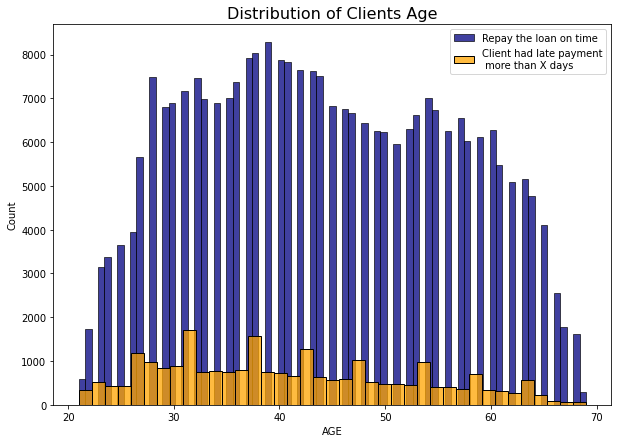

In [49]:
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(data[data['TARGET']==0]['AGE'].dropna(),color='navy',label='Repay the loan on time', ax=ax)
sns.histplot(data[data['TARGET']==1]['AGE'].dropna(),color='orange',label='Client had late payment\n more than X days', ax=ax)
plt.title('Distribution of Clients Age', size = 16)
plt.legend() ; 

Applicant setidaknya minimal berumur 21 tahun. Jika dilihat dari distribusi umur, applicant mayoritas berumur 35-45 tahun. Pada umur ini, Kebutuhan semakin meningkat seiring dengan perkembangan di dalam keluarga. 

Applicant yang memiliki kendala membayar (telat bayar) mayoritas adalah applicant berumur 31-33 tahun dan 36-38 tahun, dan yang paling sedikit kasus telat bayar adalah applicant berumur diatas 65 tahun. Jika dilihat dari fase pertumbuhan dan perkembangan, umur 20-26, adalah umur yang mulai belajar untuk memenuhi kebutuhan sendiri, namun pengelolaan keuangan belum matang. umur 27-30, adalah fase memulai hubungan, ataupun berkeluarga, kebutuhan meningkat, baik pokok, maupun gengsi. umur 30an - 40an adalah umur normal berumah tangga dan memiliki masalah keuangan serta membutuhkan uang yang lebih. umur 50an-60an, adalah fase keluarga sudah mulai mature, kebutuhan akan keuangan semakin meningkat, tetapi pengelolaannya sudah lebih matang, sedangkan umur 70an , kebutuhan akan uang adalah untuk kebutuhan kesehatan, renovasi dan lain-lain. 

Rekomendasi : 
- Dilakukan marketting campaign kepada segment applicant/client yang berumur 20-26, baik penawaran dengan alasan tawaran pinjaman biaya pendidikan, gaya hidup, dan lain-lain dan applicant berumur >65 tahun dengan tawaran pinjaman untuk biaya kesehatan, asuransi, renovasi rumah, dll untuk meningkatkan jumlah applikasi peminjaman pada platform kita. 


### 2. Distribution of Client's Employement Period

In [50]:
data['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [51]:
data['YEARS_EMPLOYED'] = round(data['DAYS_EMPLOYED']/-365)

In [52]:
data['YEARS_EMPLOYED'].max()

49.0

In [53]:
data['YEARS_EMPLOYED'].min()

-1001.0

nilai -1001.0 akan direplace dengan nilai mean 0

In [54]:
data['YEARS_EMPLOYED'].replace(-1001.0, 0, inplace = True)

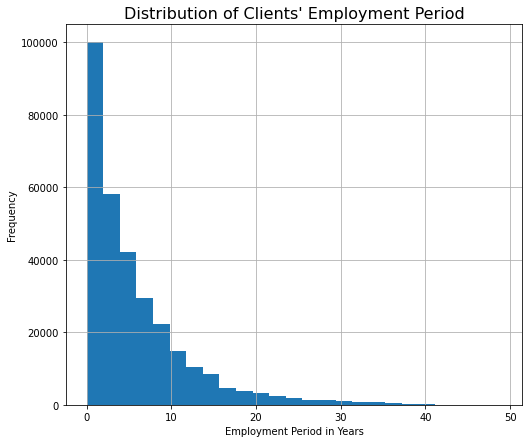

In [55]:
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 2)
data['YEARS_EMPLOYED'].hist(bins=25)
plt.title('Distribution of Clients\' Employment Period', size = 16)
plt.xlabel('Employment Period in Years')
plt.ylabel('Frequency')
plt.show()

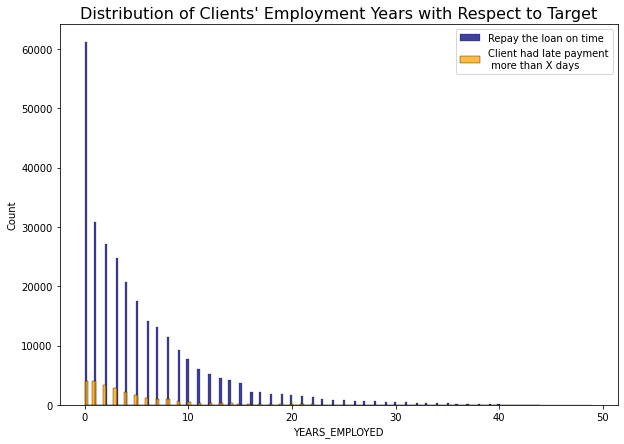

In [56]:
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(data[data['TARGET']==0]['YEARS_EMPLOYED'].dropna(),color='navy',label='Repay the loan on time', ax=ax)
sns.histplot(data[data['TARGET']==1]['YEARS_EMPLOYED'].dropna(),color='orange',label='Client had late payment\n more than X days', ax=ax)
plt.title('Distribution of Clients\' Employment Years with Respect to Target', size = 16)
plt.legend() ; 

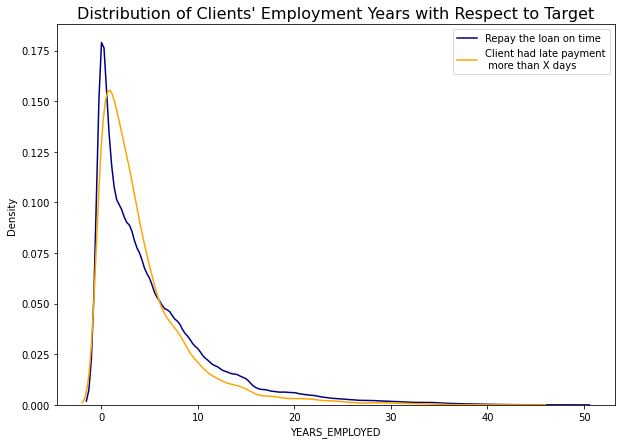

In [57]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(data[data['TARGET']==0]['YEARS_EMPLOYED'].dropna(),color='navy',label='Repay the loan on time', ax=ax)
sns.kdeplot(data[data['TARGET']==1]['YEARS_EMPLOYED'].dropna(),color='orange',label='Client had late payment\n more than X days', ax=ax)
plt.title('Distribution of Clients\' Employment Years with Respect to Target', size = 16)
plt.legend() ; 

### 3. Target by Gender

In [58]:
df_group = df.groupby(['CODE_GENDER','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
df_group['ratio']=df_group['SK_ID_CURR'].apply(lambda x:round( x*100.0/(df_group['SK_ID_CURR'].sum()),2))
df_group

,CODE_GENDER,TARGET,SK_ID_CURR,ratio
0,F,0,188278,61.23
1,F,1,14170,4.61
2,M,0,94404,30.70
3,M,1,10655,3.46
4,XNA,0,4,0.00


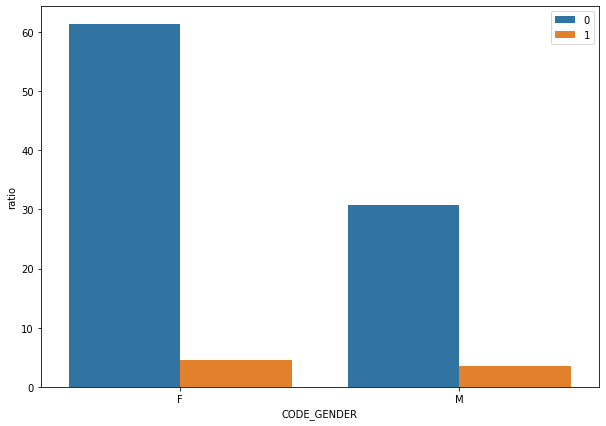

In [59]:
plt.figure(figsize = (10,7))
sns.barplot(x='CODE_GENDER', y='ratio', hue='TARGET', data=df_group[df_group['CODE_GENDER']!='XNA']) 
plt.legend()

### 4. Distribution of Clients\' Income with Respect to Target

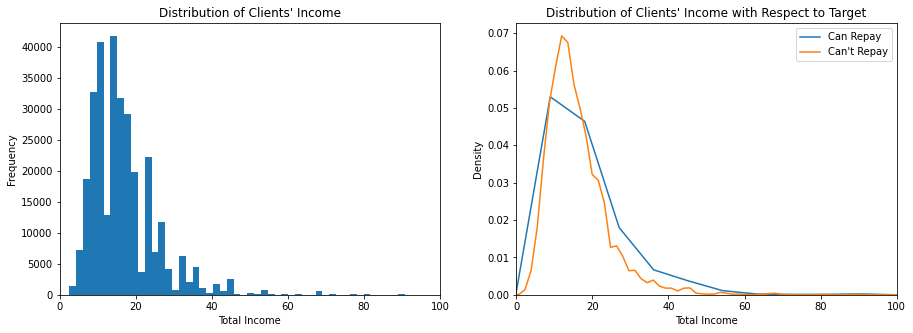

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
income = data[data['AMT_INCOME_TOTAL']!=117000000.0]
income['AMT_INCOME_TOTAL'] = income['AMT_INCOME_TOTAL']/10000
income['AMT_INCOME_TOTAL'].plot(kind='hist', bins=1000, title='Distribution of Clients\' Income');
plt.xlabel('Total Income')
plt.xlim([0,100])

plt.subplot(1, 2, 2)
sns.distplot(income[income['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can Repay');
sns.distplot(income[income['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can\'t Repay');
plt.title('Distribution of Clients\' Income with Respect to Target')
plt.xlabel('Total Income')
plt.xlim([0,100])
plt.legend();
plt.show()

Client yang melakukan pinjaman mayoritas dari golongan dengan total pendapatan dibawah 20x10^4, Jumlah client yang telat bayar juga sangat tinggi dibandingkan dengan jumlah client dengan pendapatan diatas 20x10^4. 


- Rekomendasi : Melakukan marketing campaign pada client dengan total income > 20x10^4, karena selain minimnya client dengan pendapatan demikian, juga resiko untuk telat bayar semakin kecil. 

In [44]:
df['AMT_INCOME_TOTAL'].mean()

168797.9192969845

### 5. Client's Income Type Value Counts with Respect to Target

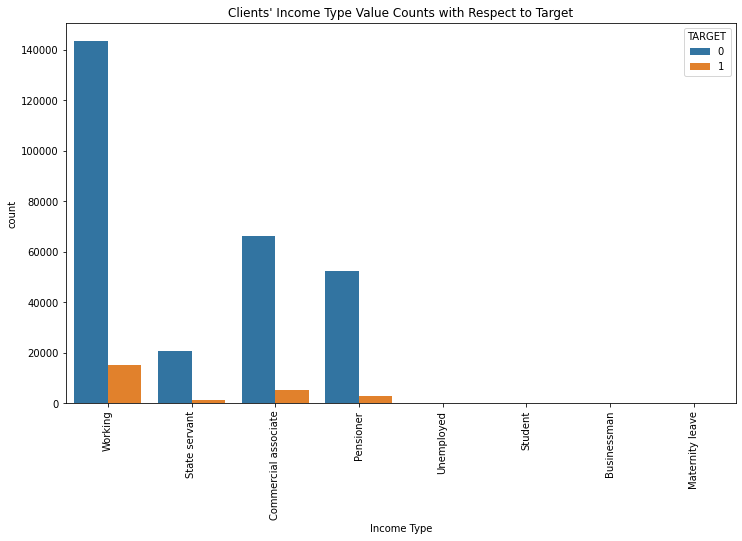

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

In [61]:
plt.figure(figsize = (12,7))
ax = sns.countplot(data=data, x='NAME_INCOME_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' Income Type Value Counts with Respect to Target')
plt.xlabel('Income Type')
plt.show()

print('\n'*2)
data.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

### 6. Client's Education Level Value Counts with Respect to Target

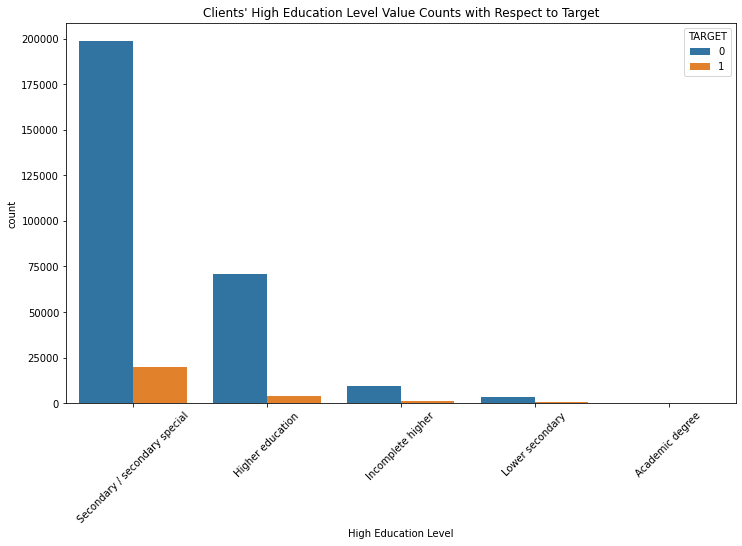

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            161
                               1              3
Higher education               0          70854
                               1           4009
Incomplete higher              0           9405
                               1            872
Lower secondary                0           3399
                               1            417
Secondary / secondary special  0         198867
                               1          19524
Name: TARGET, dtype: int64

In [62]:
plt.figure(figsize = (12,7))
ax = sns.countplot(data=data, x='NAME_EDUCATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45);
plt.title('Clients\' High Education Level Value Counts with Respect to Target')
plt.xlabel('High Education Level')
plt.show()

print('\n'*2)
data.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()

### 7. Count of Clients Owning Car and Realty with Respect to Target

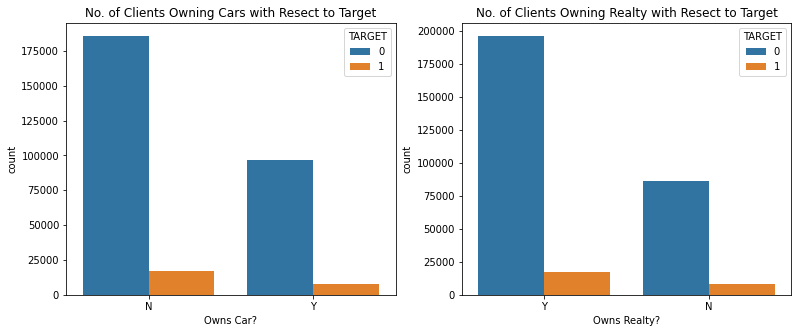

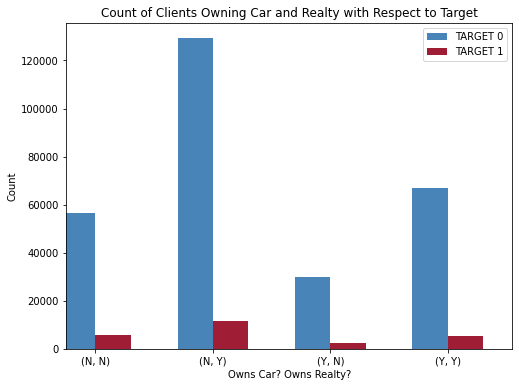

In [63]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='FLAG_OWN_CAR', hue='TARGET')
plt.title('No. of Clients Owning Cars with Resect to Target')
plt.xlabel('Owns Car?')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='TARGET')
plt.title('No. of Clients Owning Realty with Resect to Target')
plt.xlabel('Owns Realty?')
plt.show()


plt.figure(figsize=(8,6))
df[df['TARGET']==0].groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']).count()['TARGET'].plot(kind='bar', color='#4984B8', width=0.3,  position=1, label='TARGET 0')
df[df['TARGET']==1].groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']).count()['TARGET'].plot(kind='bar', color='#9F1D35', width=0.3,  position=0, label='TARGET 1')
plt.title('Count of Clients Owning Car and Realty with Respect to Target');
plt.ylabel('Count')
plt.xlabel('Owns Car? Owns Realty?')
plt.xticks(rotation=0)
plt.legend()

 # MISSING VALUES

### Missing Value Checking

In [64]:
percentage_of_null_values = ((data.isnull().sum())*100/len(data)).sort_values(ascending = False)
percentage_of_null_values[0:25]

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_ANNUITY                    0.003902
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_17               0.000000


<b> Note :
* Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. jika mean< median, digunakan nilai mean.  

In [65]:
data[['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE']].describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE
count,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,3.068510e+05,307499.000000,307510.000000
mean,0.510853,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402,1.422245,0.143421,5.143927e-01,27108.573909,-962.858788
std,0.194844,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849,2.400989,0.446698,1.910602e-01,14493.737315,826.808487
min,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,1615.500000,-4292.000000
25%,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,16524.000000,-1570.000000
50%,0.535276,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,24903.000000,-757.000000
75%,0.669057,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,6.636171e-01,34596.000000,-274.000000
max,0.896010,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000,348.000000,34.000000,8.549997e-01,258025.500000,0.000000


Proses Imputasi :
- EXT_SOURCE_3 : Diimputasi dengan nilai mean nya. 
- AMT_REQ_CREDIT_BUREAU_YEAR    ----> Median
- AMT_REQ_CREDIT_BUREAU_QRT     ----> Median = 0
- AMT_REQ_CREDIT_BUREAU_MON     ----> Median = 0
- AMT_REQ_CREDIT_BUREAU_WEEK    ----> Median = 0
- AMT_REQ_CREDIT_BUREAU_DAY     ----> Median = 0
- AMT_REQ_CREDIT_BUREAU_HOUR    ----> Median = 0
- OBS_30_CNT_SOCIAL_CIRCLE      ----> Median = 0
- DEF_30_CNT_SOCIAL_CIRCLE      ----> Median = 0
- EXT_SOURCE_2                  ----> Mean
- AMT_ANNUITY                   ----> Median
- DAYS_LAST_PHONE_CHANGE        ----> Median

### Missing Values Filling

In [66]:
data['EXT_SOURCE_3'].fillna(data['EXT_SOURCE_3'].mean(), inplace=True)
data['EXT_SOURCE_2'].fillna(data['EXT_SOURCE_2'].mean(), inplace=True)

data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)
data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median(), inplace=True)

data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   CNT_CHILDREN                307511 non-null  int64  
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   AMT_CREDIT                  307511 non-null  float64
 6   AMT_ANNUITY                 307511 non-null  float64
 7   NAME_INCOME_TYPE            307511 non-null  object 
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   REGION_POPULATION_RELATIVE  307511 non-null  float64
 10  DAYS_EMPLOYED               307511 non-null  int64  
 11  DAYS_REGISTRATION           307511 non-null  float64
 12  DAYS_ID_PUBLISH             307511 non-null  int64  
 13  FLAG_MOBIL    

# FEATURE SCALING AND TRANSFORMATION

### Label Encoding

In [68]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [69]:
# Mapping Gender dan Education
mapping_gender = {
    'F' : 0,
    'M' : 1
}
data['CODE_GENDER'] = data['CODE_GENDER'].map(mapping_gender)

# Mapping Education
mapping_education = {
    'Secondary / secondary special' : 2,
    'Higher education' : 4,
    'Incomplete higher' : 3,
    'Lower secondary' : 1,
    'Academic degree' : 5 
}
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].map(mapping_education)

#'Secondary / secondary special' : SMA,
#'Higher education' : S1,
#'Incomplete higher' : D3,
#'Lower secondary' : smp,
#'Academic degree' : diatas S1

### One Hot Encoding

In [70]:
category = data.select_dtypes(include='object')
numerical = data.select_dtypes(exclude='object')

In [71]:
cats_update = category.columns.to_list()

In [72]:
print("Data category: ", cats_update)

Data category:  ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE']


In [73]:
for cat in ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE']:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   TARGET                                 307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                     307511 non-null  object 
 2   CODE_GENDER                            307511 non-null  int64  
 3   CNT_CHILDREN                           307511 non-null  int64  
 4   AMT_INCOME_TOTAL                       307511 non-null  float64
 5   AMT_CREDIT                             307511 non-null  float64
 6   AMT_ANNUITY                            307511 non-null  float64
 7   NAME_INCOME_TYPE                       307511 non-null  object 
 8   NAME_EDUCATION_TYPE                    307511 non-null  int64  
 9   REGION_POPULATION_RELATIVE             307511 non-null  float64
 10  DAYS_EMPLOYED                          307511 non-null  

### Feature Selection ----> Ambil fitur yang penting dan memiliki korelasi saja. (fitur dengan korelasi ~0 akan dibuang). 

Text(0.5, 1.0, 'Korelasi')

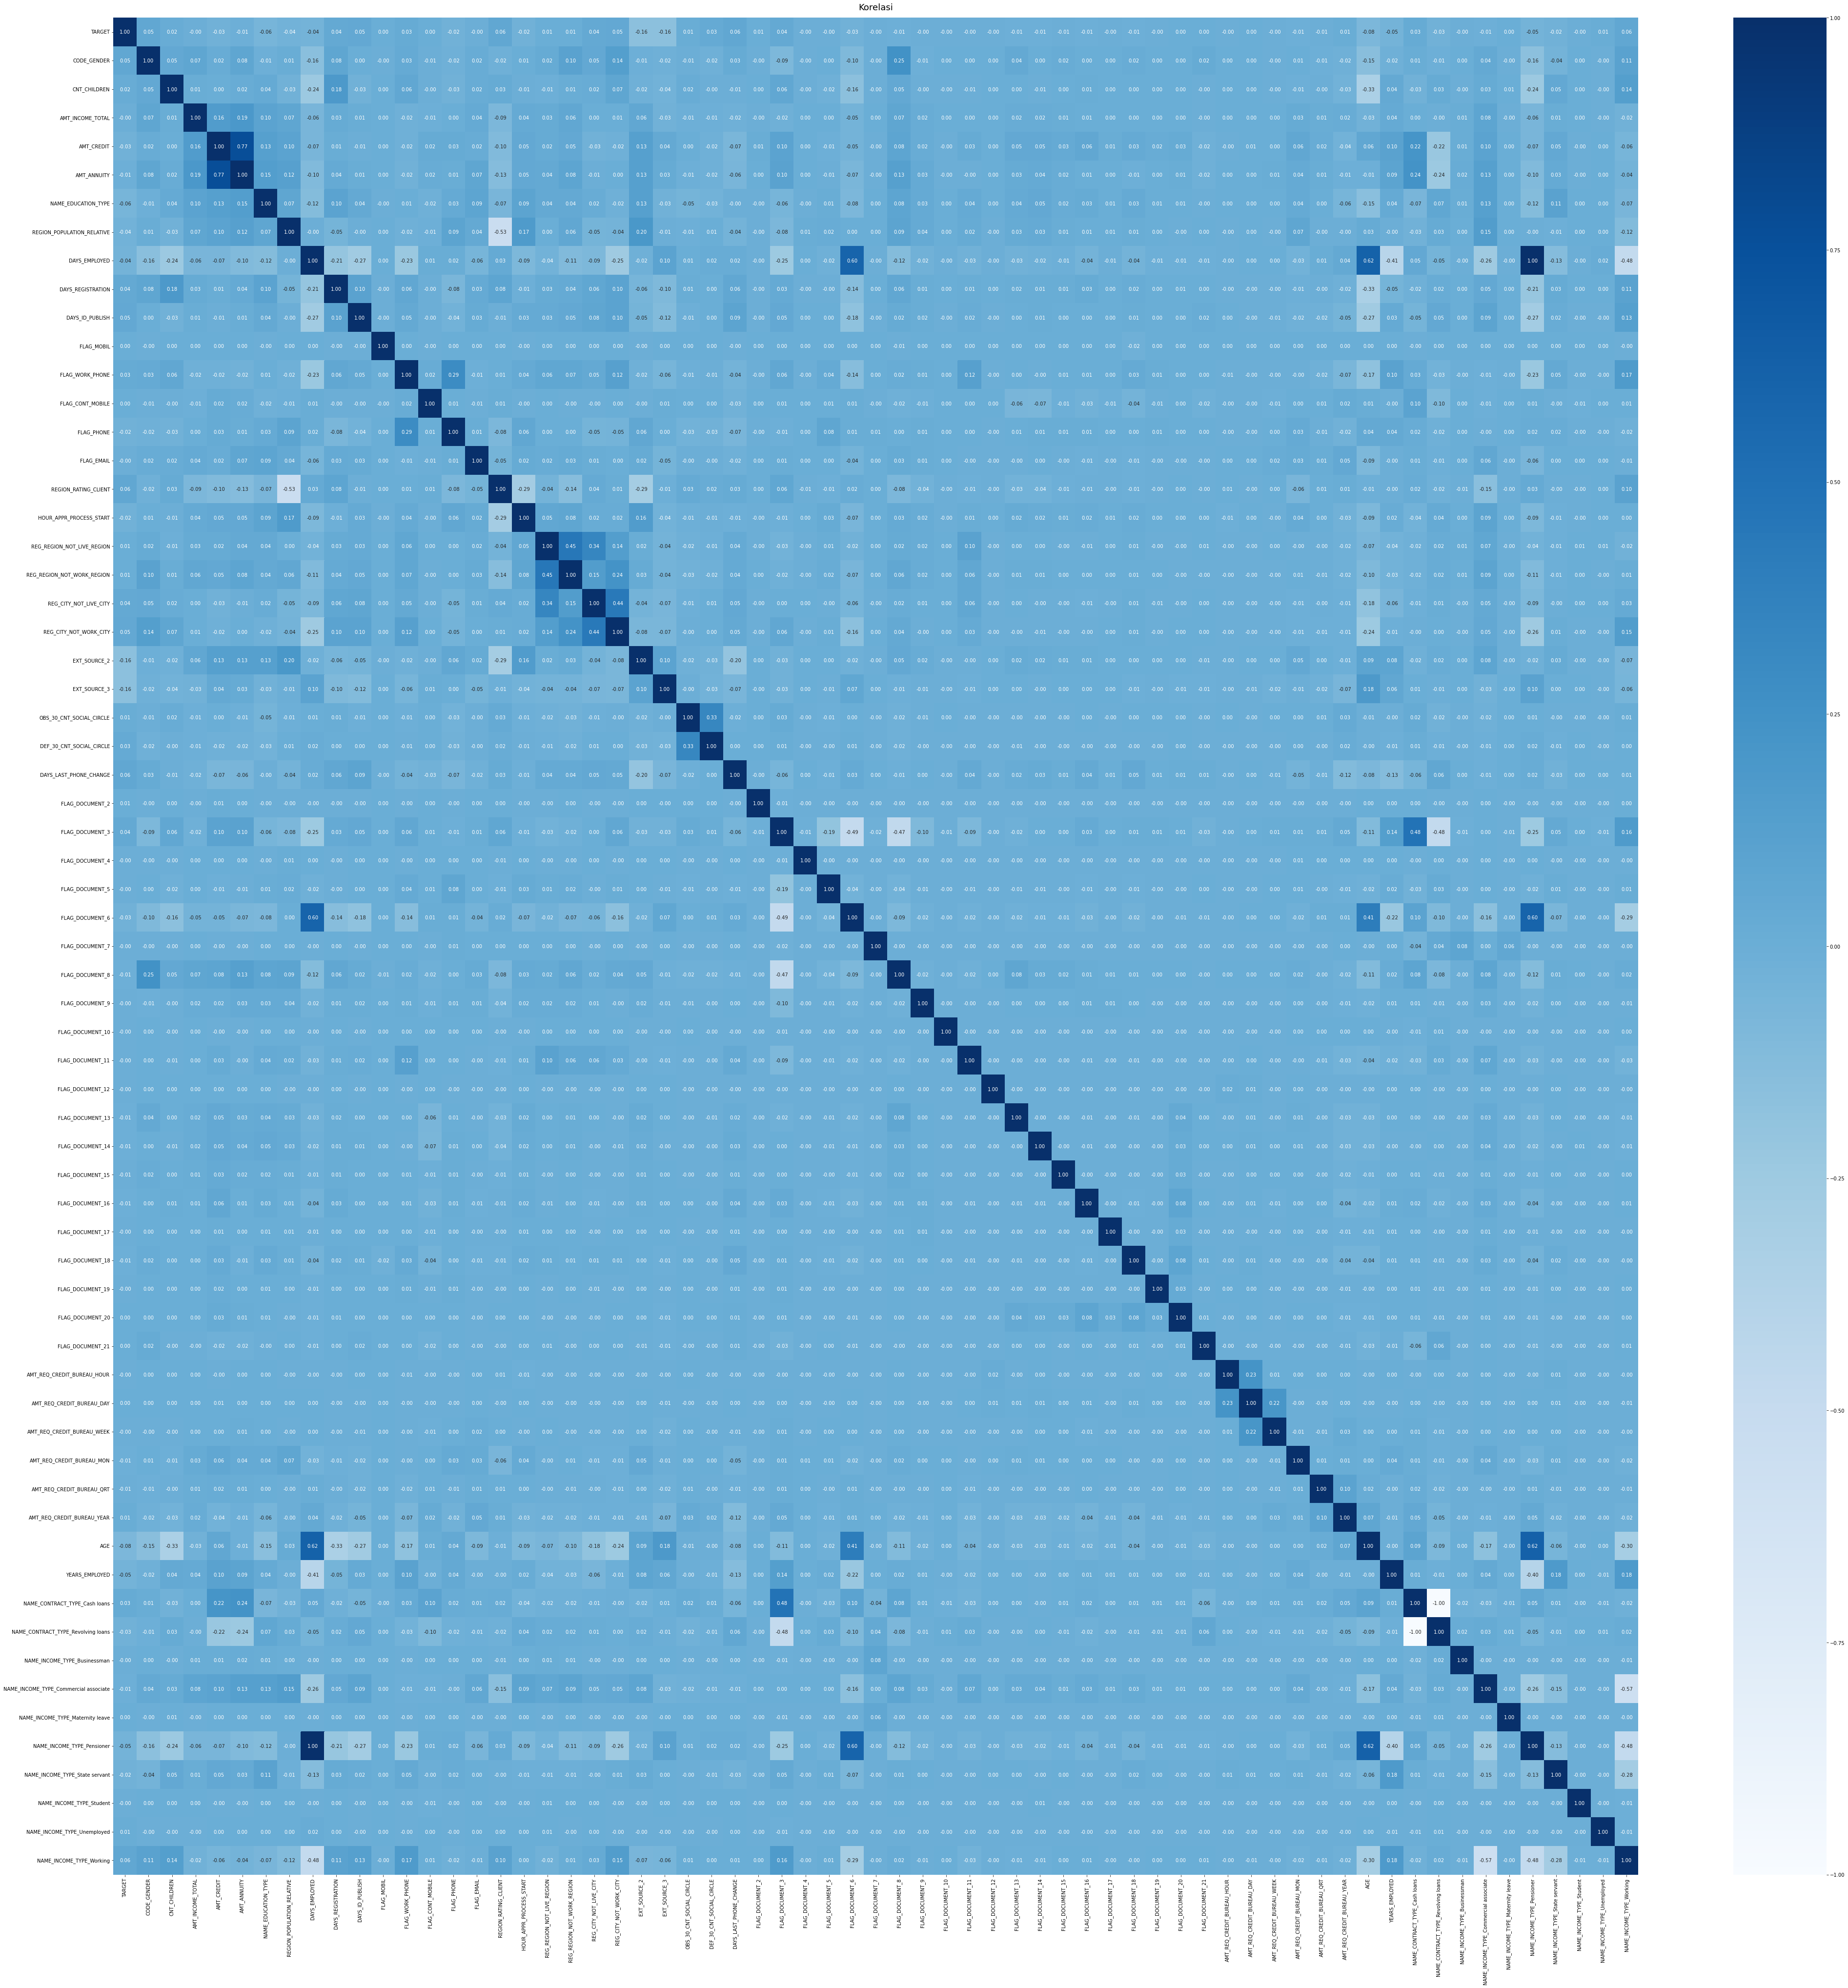

In [75]:
plt.figure(figsize=(70,70))
heatmaps=sns.heatmap(data.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   TARGET                                 307511 non-null  int64  
 1   NAME_CONTRACT_TYPE                     307511 non-null  object 
 2   CODE_GENDER                            307511 non-null  int64  
 3   CNT_CHILDREN                           307511 non-null  int64  
 4   AMT_INCOME_TOTAL                       307511 non-null  float64
 5   AMT_CREDIT                             307511 non-null  float64
 6   AMT_ANNUITY                            307511 non-null  float64
 7   NAME_INCOME_TYPE                       307511 non-null  object 
 8   NAME_EDUCATION_TYPE                    307511 non-null  int64  
 9   REGION_POPULATION_RELATIVE             307511 non-null  float64
 10  DAYS_EMPLOYED                          307511 non-null  

In [77]:
unfaedah_col = ['CNT_CHILDREN', 'AMT_ANNUITY', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
                'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE',
                'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                'NAME_INCOME_TYPE_Unemployed' , 'NAME_INCOME_TYPE_Student' , 'NAME_INCOME_TYPE_State servant' , 'NAME_INCOME_TYPE_Maternity leave', 
                'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Businessman','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 
                'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']

In [78]:
data= data.drop(unfaedah_col, axis = 1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TARGET                              307511 non-null  int64  
 1   CODE_GENDER                         307511 non-null  int64  
 2   AMT_CREDIT                          307511 non-null  float64
 3   NAME_EDUCATION_TYPE                 307511 non-null  int64  
 4   REGION_POPULATION_RELATIVE          307511 non-null  float64
 5   DAYS_EMPLOYED                       307511 non-null  int64  
 6   DAYS_REGISTRATION                   307511 non-null  float64
 7   DAYS_ID_PUBLISH                     307511 non-null  int64  
 8   FLAG_WORK_PHONE                     307511 non-null  int64  
 9   REGION_RATING_CLIENT                307511 non-null  int64  
 10  REG_CITY_NOT_LIVE_CITY              307511 non-null  int64  
 11  REG_CITY_NOT_WORK_CITY    

Text(0.5, 1.0, 'Korelasi')

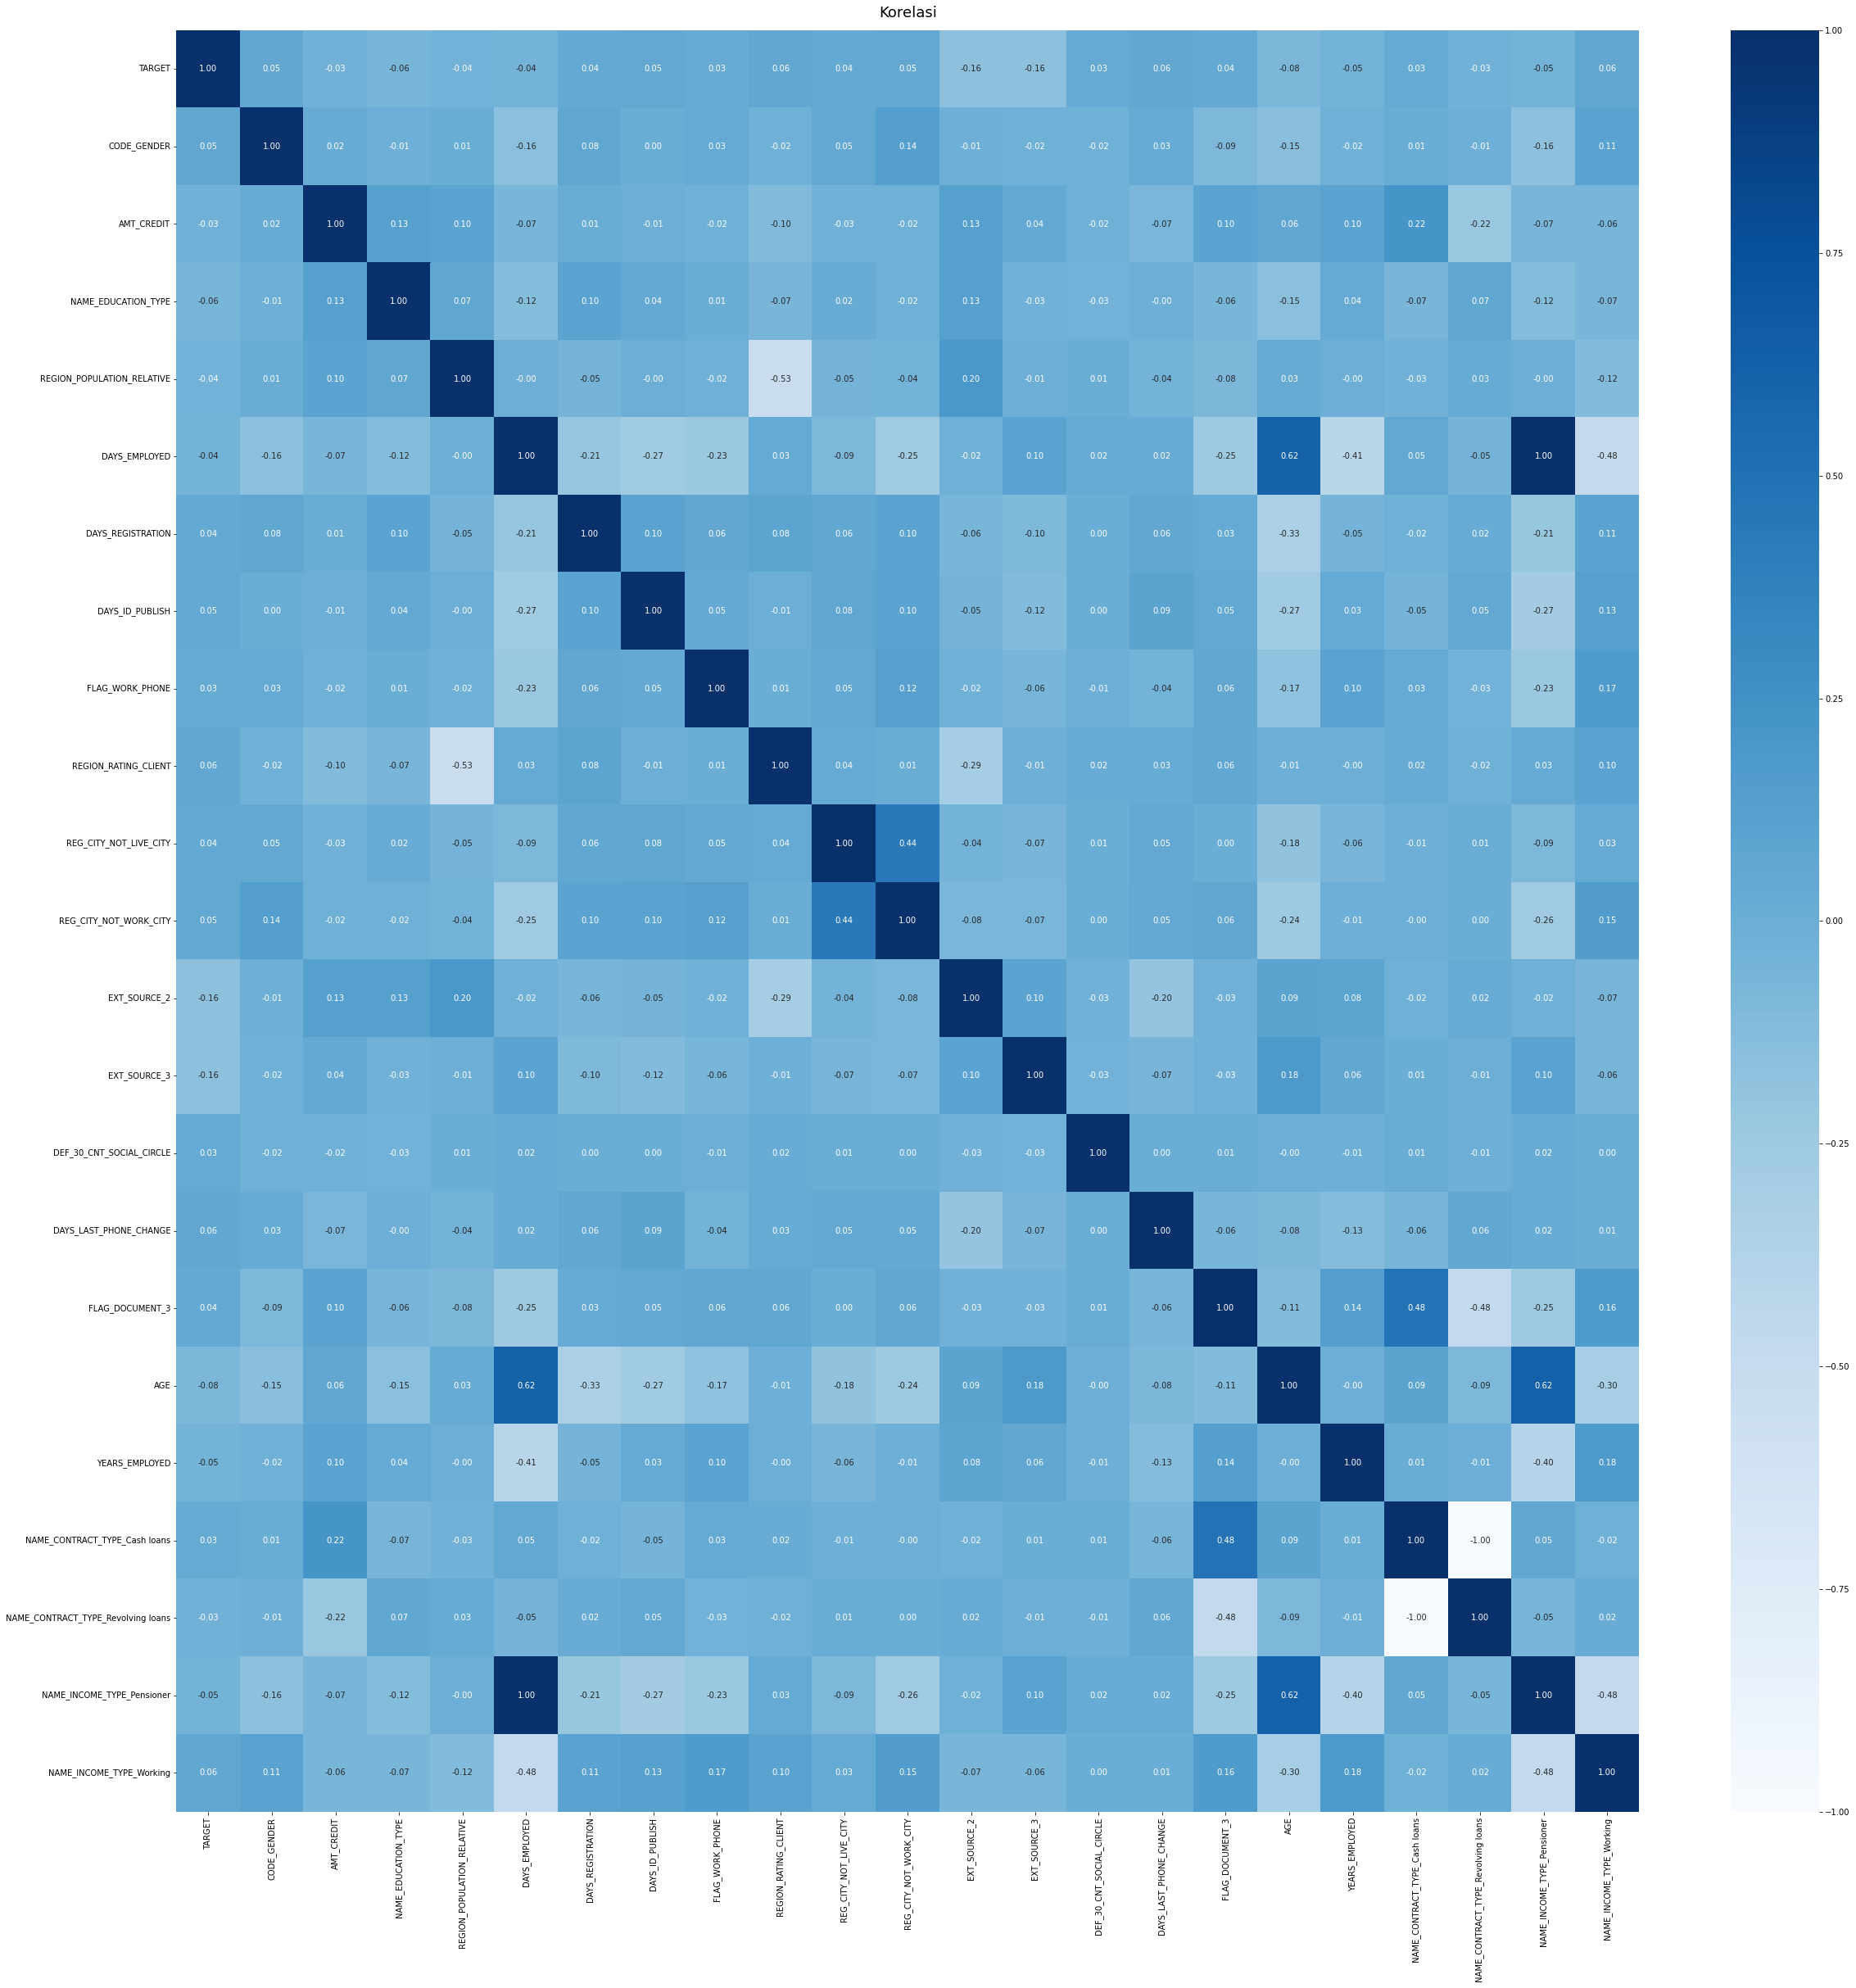

In [80]:
plt.figure(figsize=(40,40))
heatmaps=sns.heatmap(data.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

### Univariative Analysis

In [81]:
category = data.select_dtypes(include='object')
numerical = data.select_dtypes(exclude='object')

In [82]:
nums = numerical.columns.to_list()
cats = category.columns.to_list()

In [83]:
print("Data numerik: ", nums)
print("Data category: ", cats)

Data numerik:  ['TARGET', 'CODE_GENDER', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AGE', 'YEARS_EMPLOYED', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working']
Data category:  []


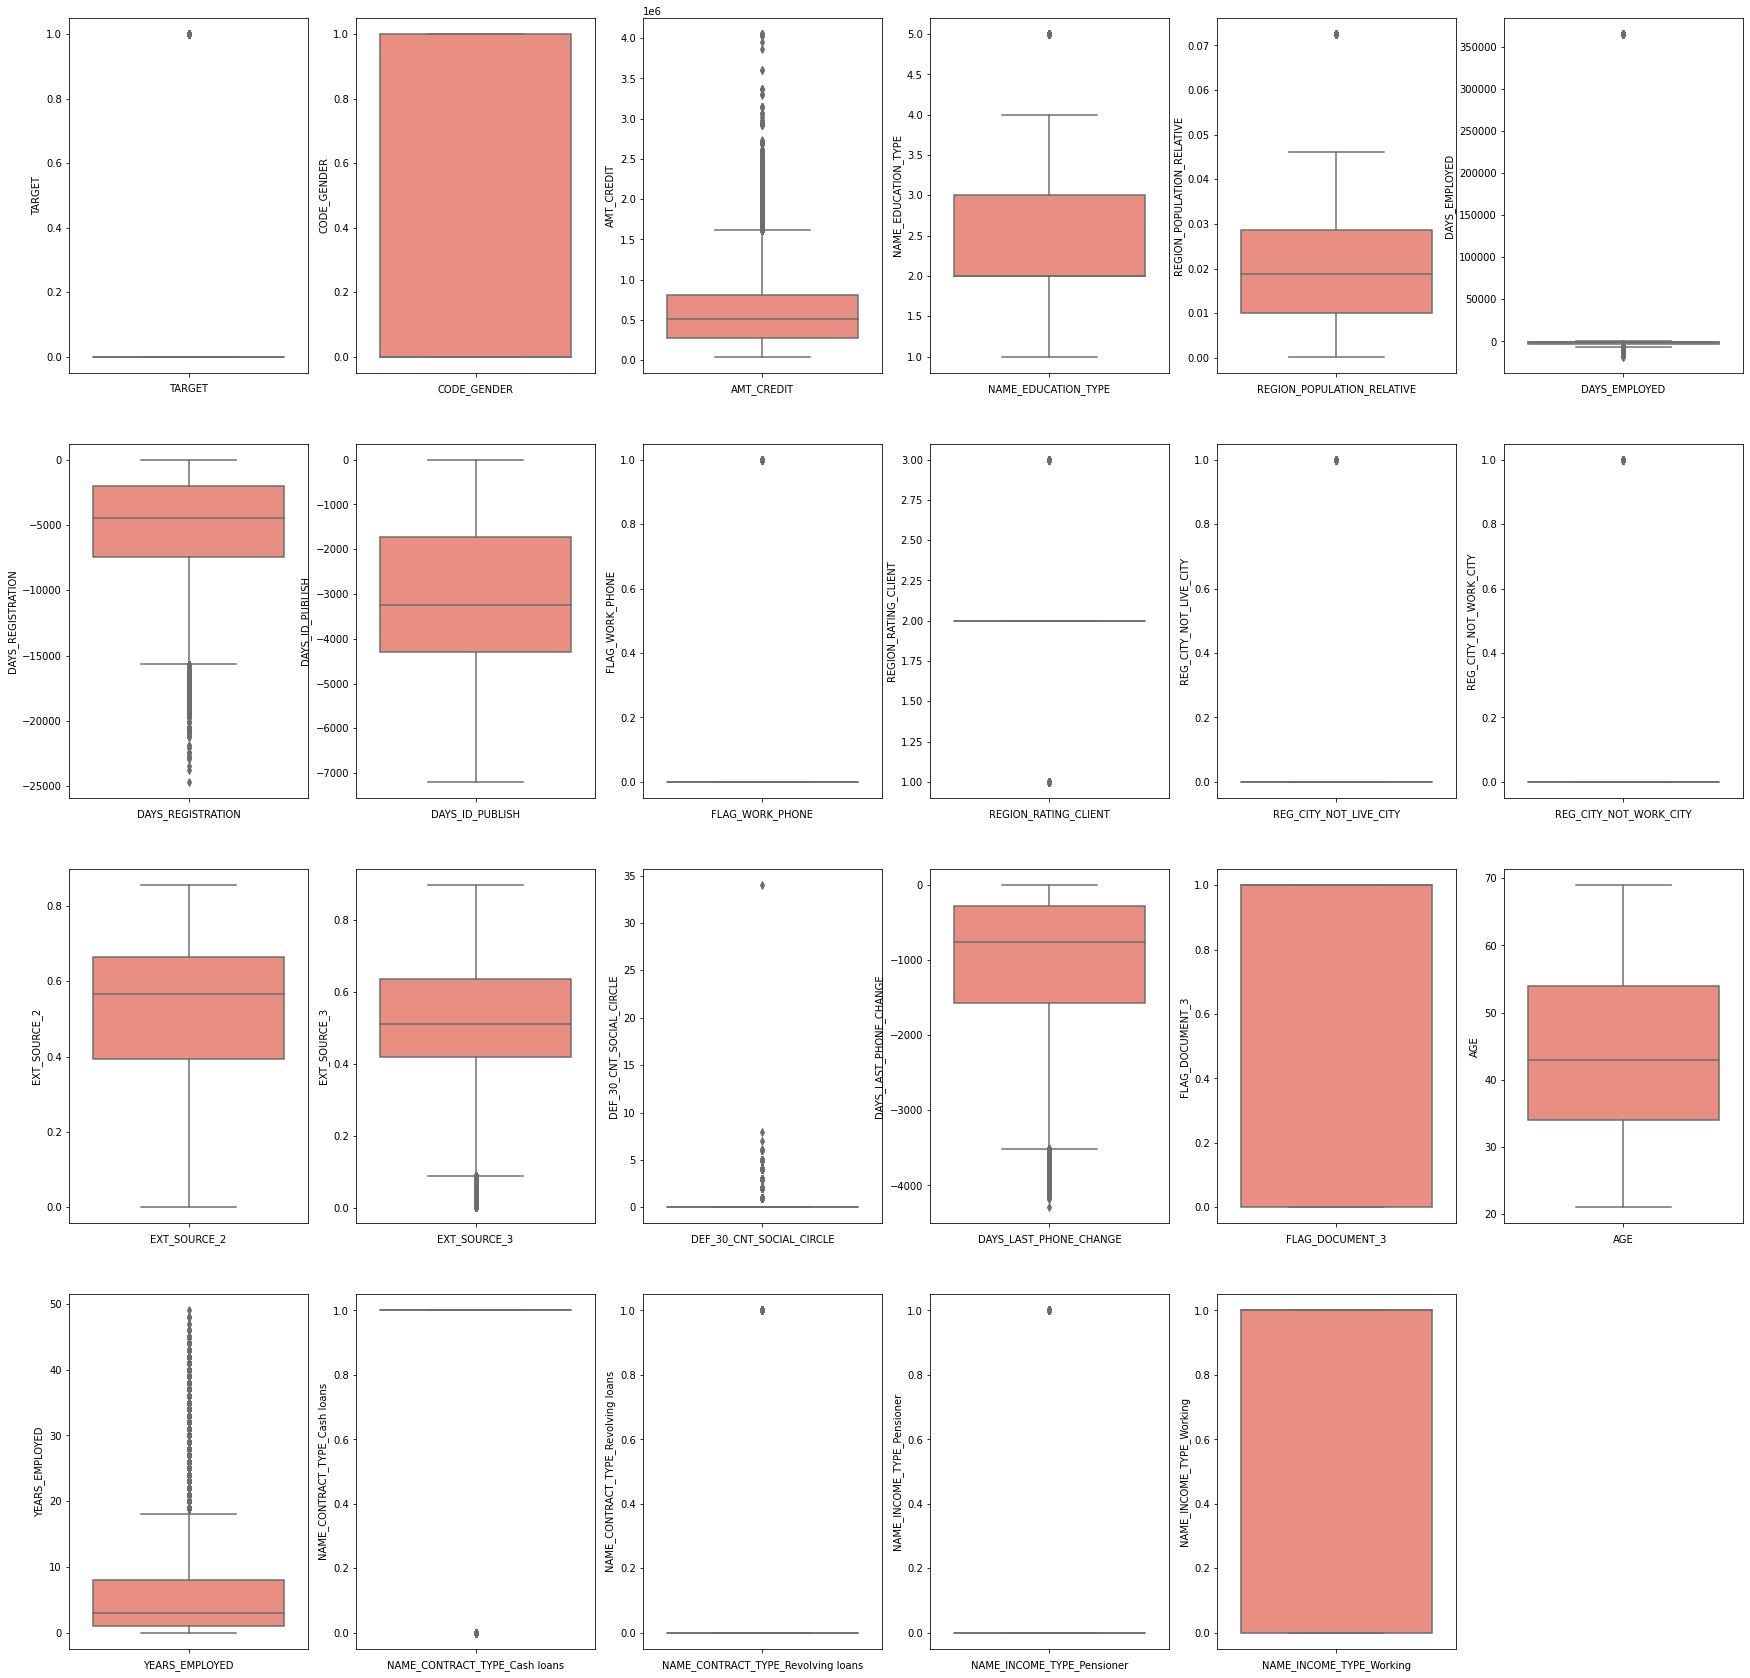

In [84]:
plt.figure(figsize=(30,30))
features = nums
for i in range(0, len(features)):
    plt.subplot(4, 6, i+1)
    sns.boxplot(y=data[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

Pada fitur 'DEF_30_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', dan 'DAYS_EMPLOYED' ada outlier yang begitu mengganggu. Outlier akan dihapus dengan metode Z-score

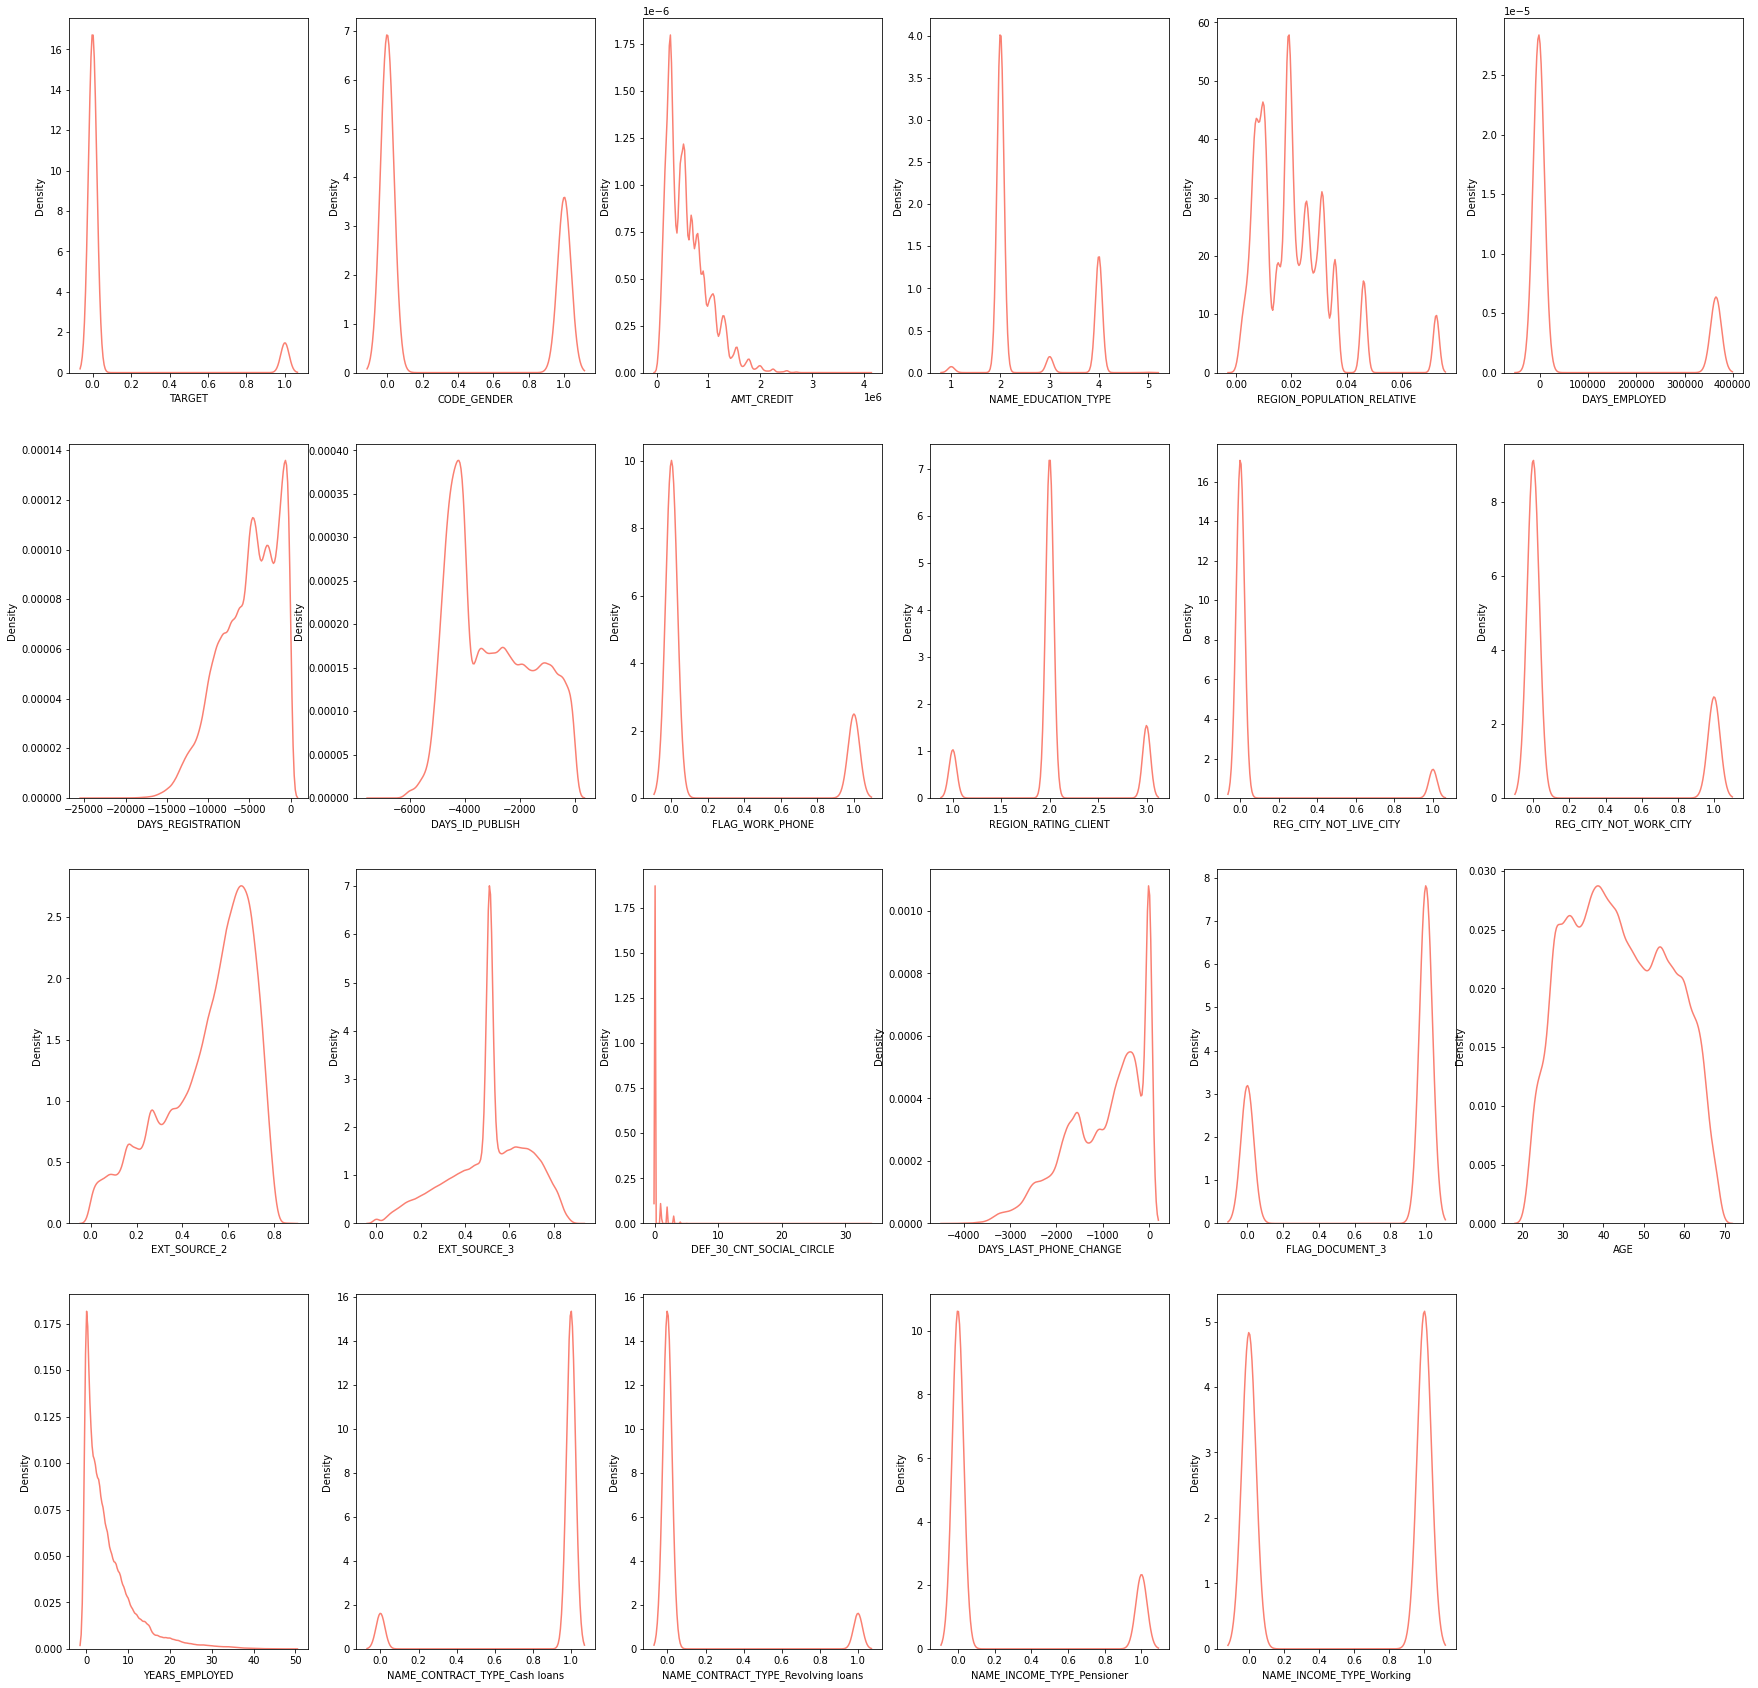

In [85]:
features = nums
plt.figure(figsize=(30, 30))
for i in range(0, len(features)):
    plt.subplot(4, 6, i+1)
    sns.kdeplot(x=data[features[i]], color='salmon')
    plt.xlabel(features[i])

### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [86]:
numerical = data.select_dtypes(exclude='object')
nums = numerical.columns.to_list()
print("Data numerik: ", nums)

Data numerik:  ['TARGET', 'CODE_GENDER', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AGE', 'YEARS_EMPLOYED', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_Working']


In [87]:
num_col = data[[col for col in data.columns if (str(data[col].dtype) != 'object') and col not in ['TARGET']]]

In [88]:
num_col = num_col.columns.to_list()

In [89]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[num_col]), columns=num_col)

In [90]:
std.head()

,CODE_GENDER,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,...,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working
0,1.388176,-0.478095,-0.582598,-0.149452,-0.456215,0.379837,0.579154,-0.499013,-0.103064,-0.291208,...,-2.129249,4.163504,-0.206992,0.639065,-1.499382,-0.530639,0.324395,-0.324395,-0.468573,0.967876
1,-0.720370,1.725450,1.704312,-1.252750,-0.460115,1.078697,1.790855,-0.499013,-2.067573,-0.291208,...,0.000000,-0.320480,0.163107,0.639065,0.172296,-0.372539,0.324395,-0.324395,-0.468573,-1.033190
2,1.388176,-1.152888,-0.582598,-0.783451,-0.453299,0.206116,0.306869,2.003956,-0.103064,-0.291208,...,1.253633,-0.320480,0.178831,-1.564786,0.673799,-0.688739,-3.082659,3.082659,-0.468573,0.967876
3,-0.720370,-0.711430,-0.582598,-0.928991,-0.473217,-1.375829,0.369143,-0.499013,-0.103064,-0.291208,...,0.000000,-0.320480,0.418306,0.639065,0.673799,0.417963,0.324395,-0.324395,-0.468573,0.967876
4,1.388176,-0.213734,-0.582598,0.563570,-0.473210,0.191639,-0.307263,-0.499013,-0.103064,-0.291208,...,0.000000,-0.320480,-0.173126,-1.564786,0.924551,0.417963,0.324395,-0.324395,-0.468573,0.967876


In [91]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CODE_GENDER                         307511 non-null  float64
 1   AMT_CREDIT                          307511 non-null  float64
 2   NAME_EDUCATION_TYPE                 307511 non-null  float64
 3   REGION_POPULATION_RELATIVE          307511 non-null  float64
 4   DAYS_EMPLOYED                       307511 non-null  float64
 5   DAYS_REGISTRATION                   307511 non-null  float64
 6   DAYS_ID_PUBLISH                     307511 non-null  float64
 7   FLAG_WORK_PHONE                     307511 non-null  float64
 8   REGION_RATING_CLIENT                307511 non-null  float64
 9   REG_CITY_NOT_LIVE_CITY              307511 non-null  float64
 10  REG_CITY_NOT_WORK_CITY              307511 non-null  float64
 11  EXT_SOURCE_2              

In [92]:
data_1 = pd.concat([std, data[['TARGET']]], axis=1)

In [93]:
data_1.head()

,CODE_GENDER,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,...,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,TARGET
0,1.388176,-0.478095,-0.582598,-0.149452,-0.456215,0.379837,0.579154,-0.499013,-0.103064,-0.291208,...,4.163504,-0.206992,0.639065,-1.499382,-0.530639,0.324395,-0.324395,-0.468573,0.967876,1
1,-0.720370,1.725450,1.704312,-1.252750,-0.460115,1.078697,1.790855,-0.499013,-2.067573,-0.291208,...,-0.320480,0.163107,0.639065,0.172296,-0.372539,0.324395,-0.324395,-0.468573,-1.033190,0
2,1.388176,-1.152888,-0.582598,-0.783451,-0.453299,0.206116,0.306869,2.003956,-0.103064,-0.291208,...,-0.320480,0.178831,-1.564786,0.673799,-0.688739,-3.082659,3.082659,-0.468573,0.967876,0
3,-0.720370,-0.711430,-0.582598,-0.928991,-0.473217,-1.375829,0.369143,-0.499013,-0.103064,-0.291208,...,-0.320480,0.418306,0.639065,0.673799,0.417963,0.324395,-0.324395,-0.468573,0.967876,0
4,1.388176,-0.213734,-0.582598,0.563570,-0.473210,0.191639,-0.307263,-0.499013,-0.103064,-0.291208,...,-0.320480,-0.173126,-1.564786,0.924551,0.417963,0.324395,-0.324395,-0.468573,0.967876,0


# MENGHAPUS OUTLIER

In [94]:
data_model = data_1.copy()

In [95]:
nums_outlier = ['DEF_30_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED']

In [96]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(data_1)}')

filtered_entries = np.array([True] * len(data_1))

for col in data_model[nums_outlier]:
    zscore = abs(stats.zscore(data_1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data_model = data_1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(data_model)}')
print('Maka outlier yang dihapus sekitar', round((len(data_1)-len(data_model))/len(data_model)*100), '%')

Jumlah baris sebelum memfilter outlier: 307511
Jumlah baris setelah memfilter outlier: 292360
Maka outlier yang dihapus sekitar 5 %


In [97]:
data_model.head()

,CODE_GENDER,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,...,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AGE,YEARS_EMPLOYED,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,TARGET
1,-0.720370,1.725450,1.704312,-1.252750,-0.460115,1.078697,1.790855,-0.499013,-2.067573,-0.291208,...,-0.32048,0.163107,0.639065,0.172296,-0.372539,0.324395,-0.324395,-0.468573,-1.033190,0
2,1.388176,-1.152888,-0.582598,-0.783451,-0.453299,0.206116,0.306869,2.003956,-0.103064,-0.291208,...,-0.32048,0.178831,-1.564786,0.673799,-0.688739,-3.082659,3.082659,-0.468573,0.967876,0
3,-0.720370,-0.711430,-0.582598,-0.928991,-0.473217,-1.375829,0.369143,-0.499013,-0.103064,-0.291208,...,-0.32048,0.418306,0.639065,0.673799,0.417963,0.324395,-0.324395,-0.468573,0.967876,0
4,1.388176,-0.213734,-0.582598,0.563570,-0.473210,0.191639,-0.307263,-0.499013,-0.103064,-0.291208,...,-0.32048,-0.173126,-1.564786,0.924551,0.417963,0.324395,-0.324395,-0.468573,0.967876,0
5,1.388176,-0.269648,-0.582598,1.078997,-0.462947,0.004576,1.667631,2.003956,-0.103064,-0.291208,...,-0.32048,-1.902674,0.639065,0.172296,-0.214438,0.324395,-0.324395,-0.468573,-1.033190,0


# MODELING

### Train-Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = data_model.drop('TARGET', axis=1)
y = data_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [100]:
X_train.shape, X_test.shape

((233888, 22), (58472, 22))

### Training

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [110]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
12,EXT_SOURCE_3,0.365633
11,EXT_SOURCE_2,0.295402
16,AGE,0.082054
2,NAME_EDUCATION_TYPE,0.039622
4,DAYS_EMPLOYED,0.033441
14,DAYS_LAST_PHONE_CHANGE,0.033402
21,NAME_INCOME_TYPE_Working,0.026513
17,YEARS_EMPLOYED,0.023152
0,CODE_GENDER,0.021870
6,DAYS_ID_PUBLISH,0.016853


### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [104]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC 

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score

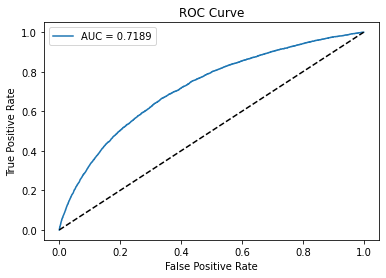

In [106]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS 

In [107]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [108]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,147723,0,0.036141,1,0,1,0.000017,0.0,0.000019
1,40008,0,0.036261,2,0,2,0.000034,0.0,0.000037
2,243737,0,0.036462,3,0,3,0.000051,0.0,0.000056
3,184842,0,0.036465,4,0,4,0.000068,0.0,0.000074
4,297464,0,0.036465,5,0,5,0.000086,0.0,0.000093


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3288')

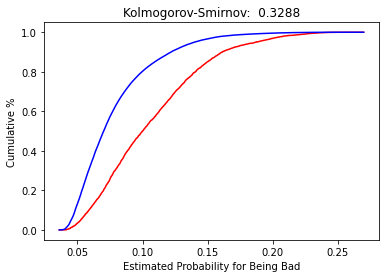

In [109]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.72` dan `KS = 0.33`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

Beberapa hal lain yang dapat dilakukan untuk project ini:

- Jika menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan pendekatan-pendekatannya seperti Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.

- Melakukan hyperparameter tuning.

- Melakukan pemeriksaan atau memastikan bahwa model yang telah dibuat tidak overfitting. Hal ini dapat dilakukan dengan mencoba membandingkan hasil performa model ketika diprediksi terhadap data training dan ketika diprediksi terhadap data testing.
